In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine = pd.read_csv('http://bit.ly/wine_csv_data')
print(wine.head())
wine.info() #각 열의 데이터 타입, 누락된 데이터 확인
print(wine.describe()) #열에 대한 간략한 통계
print()

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1, max_iter=1000)
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
           alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000 

0.996921300750433
0.8592307692307692


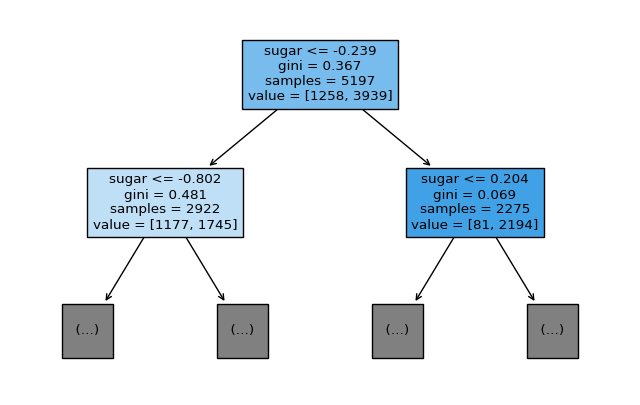

0.8454877814123533
0.8415384615384616

0.9080238599191841
0.8453846153846154


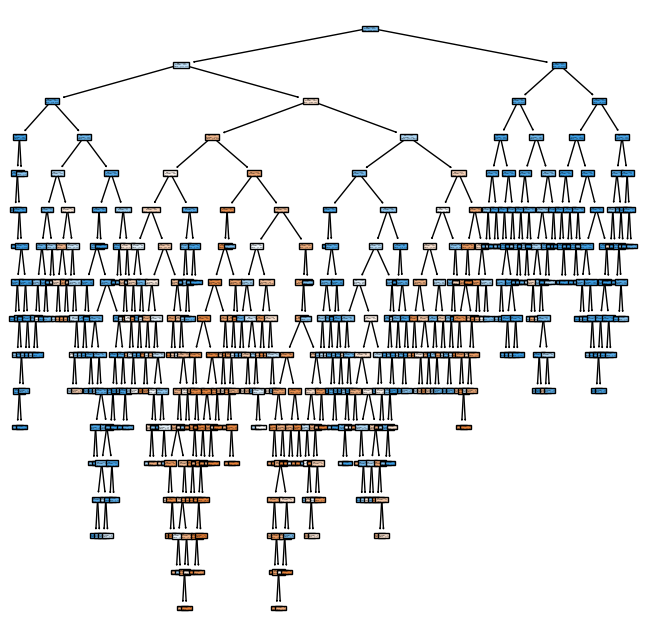

[0.19371112 0.63355941 0.17272947]


In [3]:
#결정 트리: 이유를 설명하기 쉽다. ex)스무고개
wine = pd.read_csv('http://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42) #criterion
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

#그림으로 출력 -> plot_tree()
from sklearn.tree import plot_tree
plt.figure(figsize=(8, 5))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcoho', 'sugar', 'pH'])
plt.show()

#지니 불순도(gini) / 불순도 = 최적의 질문을 찾기 위한 기준
#criterion = 노드에서 데이터를 분할할 기준 ex) 당도 -0.239 -> 매개변수의 기본값 = gini 
#지니 불순도 = 1-(음성 클래스 비율^2 + 양성 클레스 비율^2)
#부모노드와 자식노드의 불순도 차이가 가능한 크도록 트리를 성장 -> 부모노드와 자식노드 사이의 불순도 차이 = 정보이득 => 정보 이득이 최대가 되도록 나눈다.

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))
print()
# plt.figure(figsize=(8, 6))
# plot_tree(dt, filled=True, feature_names=['alcoho', 'sugar', 'pH'])
# plt.show()


#표준화 전처리를 할 필요 없다.
wine = pd.read_csv('http://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_depth=39, min_samples_leaf= 7, min_samples_split= 13, random_state=42)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

plt.figure(figsize=(8, 8))
plot_tree(dt, filled=True, feature_names=['alcoho', 'sugar', 'pH'])
plt.show()
print(dt.feature_importances_) #어떤 특성이 가장 유용한지 나타내는 특성 중요도 계산 = 특성 중요도: 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더해 계산

In [4]:
wine = [[9.4, 1.9, 3.51]]
dt.predict(wine)

array([0.])

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#교차 검증과 그리드 서치
wine = pd.read_csv('http://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

#검증 세트 - 훈련세트를 나눈다.
sub_input, val_input, sub_target, val_target = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

#교차 검증 / 기본 5-폴드-교차 검증 -> 훈련 세트를 5부분으로 나누어 교차 검증 => K-폴드 교차 검증
# cross_validate() = 교차 검증 함수 (평가할 모델 객체, 훈련 세트 전체)
from sklearn.model_selection import cross_validate
score = cross_validate(dt, X_train, y_train)
print(score) #모델 훈련 시간, 검증 시간 / 검증 폴드의 점수
print()

from sklearn.model_selection import StratifiedKFold #분류 모델 / 회귀 = KFold, 분류 = stratifiedKFold
score = cross_validate(dt, X_train, y_train, cv=StratifiedKFold()) #교차 검증을 할 때 훈련 세트를 섞으려면 분할기 지정 cv=StratifiedFKold
print(score)
print()

# 훈련 세트를 섞고 10-폴드 교차 검증
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) #10-폴드 교차 검증 / n_splits 몇-폴드 교차 검증을 할지 정한다.
#score = cross_validate(dt, X_train, y_train, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))
score = cross_validate(dt, X_train, y_train, cv=splitter)
print(score)
print("1")


#그리드 서치 / 하이퍼파라미터 탐색과 교차 검증 한 번에 -> 모델이 학습할 수 없어서 사용자가 지정하는 파라미터 / 모델에서 가장 적합한 하이퍼파라미터 찾기
#min_samples_split : 디폴트는 2이다. 노드를 분할하기 위한 최소한의 샘플 데이터 수, 분할 할 수 있는 샘플수를 지정
#min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]} #최소 불순도
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1) #값마다 5-폴드 교차 검증 / n_jobs= CPU 코어 수
gs.fit(X_train, y_train)
dt = gs.best_estimator_
print(dt.score(X_train, y_train))
print(gs.best_params_) #최적의 매개변수
print(gs.cv_results_['mean_test_score']) #교차 검증의 평균 점수
print("2")

best_index = np.argmax(gs.cv_results_['mean_test_score']) #np.argmax() 가장 큰 값의 인덱스 추출
print(gs.cv_results_['params'][best_index])
print(gs.cv_results_['params'])
print("3")


params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), 'max_depth': range(5, 20, 1), 'min_samples_split': range(2, 100, 10)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))
print()


#랜덤 서치
#매개변수를 샘플링할 수 있는 확률 분포 객체를 전달
from scipy.stats import uniform, randint #주어진 범위에서 고르게 값을 뽑는다. uniform실수 / randint정수
params = {'min_impurity_decrease': uniform(0.0001, 0.001),'max_depth': randint(20, 50), 'min_samples_split': randint(2, 25), 'min_samples_leaf': randint(1, 25)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42) #n_iter=100 샘플링 횟수
gs.fit(X_train, y_train)
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

dt = gs.best_estimator_ #최적의 결과가 best_estomator_에 저장됨
print(dt.score(X_train, y_train))

0.9971133028626413
0.864423076923077
{'fit_time': array([0.00899506, 0.00782371, 0.00737309, 0.00667405, 0.00594211]), 'score_time': array([0.00070405, 0.0005641 , 0.00049615, 0.00044799, 0.00039983]), 'test_score': array([0.87019231, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

{'fit_time': array([0.00550199, 0.00507903, 0.00502086, 0.00489902, 0.0043869 ]), 'score_time': array([0.00037313, 0.00035477, 0.00034308, 0.00033998, 0.00030708]), 'test_score': array([0.87019231, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

{'fit_time': array([0.00521374, 0.0050199 , 0.00499034, 0.00491405, 0.00462294,
       0.00473022, 0.00477815, 0.00466585, 0.00476098, 0.00463986]), 'score_time': array([0.00029016, 0.00025392, 0.00024581, 0.00024295, 0.00023818,
       0.00023913, 0.00024199, 0.00023913, 0.00023317, 0.00023293]), 'test_score': array([0.83461538, 0.88461538, 0.85384615, 0.85384615, 0.84615385,
       0.87307692, 0.86153846, 0.85549133, 0.85163776, 0.86705202])}
1
0.961516259380

In [6]:
wine = [[90.4, 12.9, 3.51]]
dt.predict(wine)

array([1.])

##### 랜덤 포레스트
> - 가장 대표적인 앙상블 학습 알고리즘
> - 성능이 좋고 안정적이기 때문에 첫 번째로 시도해 볼 수 있는 앙상블 학습 중 하나
> - 결정 트리를 만들기 훈련하기 위해 부트스트랩 샘플을 만들고 전체 특성 중 일부를 랜덤하게 선택해 결정 트리를 만든다

##### 엑스트라 트라
> - 랜덤 포레스트와 비슷하지만 부트스트랩 샘플을 사용하지 않고 노드를 분할할 때 랜덤하게 분할한다.
> - 랜덤 포레스트보다 훈련 속도가 빠르지만 더 많은 트리가 필요하다.

##### 그레이디언트 부스팅
> - 깊이가 얕은 트리를 연속적으로 추가해 손실 함수를 최소화하는 앙상블 방법
> - 성능이 뛰어나지만 병렬로 훈련할 수 없기 때문에 훈련 속도가 느리다.
> - 학습률 매개변수를 조정해 모델의 복잡도를 제어할 수 있다.
> - 학습률 매개변수가 크면 복잡하고 훈련 세트에 과대적합된 모델을 얻을 수 있다.


In [7]:
#앙상블 학습 -> 정형 데이터를 다루는 데 가장 뛰어난 성과를 내는 알고리즘

#랜덤 포레스트 = 과대적합 방지, 검증세트 테스트세트에서 안정적인 성능을 얻을 수 있다. / 중복을 허용해 데이터를 샘플링 -> 부트스트랩 샘플
# 기본적으로 100개의 결정트리 -> 분류: 트리의 클래스별 확률을 평균해 가장 높은 확률을 가진 클래스를 예측으로 삼는다. 회귀: 각 트리의 예측을 평균한다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine = pd.read_csv('http://bit.ly/wine_csv_data')
wine.head()
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_jobs=-1, random_state=42) #기본 100개 결정트리
scores = cross_validate(rf, X_train, y_train, return_train_score=True, n_jobs=-1) #return_train_score=True 검증 점수, 훈련세트 점수 반환->과대적합 파악 용이 / n_jobs=-1 CPU 수
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
print()

rf.fit(X_train, y_train)
print("중요도", rf.feature_importances_) # 중요도: 어떤 특성이 가장 유용한지 나타낸다.

#자체적으로 모델을 평가하는 점수를 얻을 수 있다.
#oob_score=True 부트스트랩 샘플에 포함되지 않고 남는 샘플
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
print(rf.oob_score_)
print()


#extra tree
#extra / 기본적으로 100개 결정트리 훈련, 부트스트램 샘플 사용X, 무작위 분할
#많은 트리를 앙상블 하기 때문에 과대적합을 막고 검증 세트의 점수를 높이는 효과가 있다.
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

et.fit(X_train, y_train)
print("중요도", et.feature_importances_)
print()

#그레이디언트 부스팅 / 깊이가 얕은 결정트리 사용 -> 이전 트리의 오차 보완 / 깊이가 얕아 과대 적합에 강하고 높은 일반화 성능
#기본적으로 결정트리 100개, 깊이 3 / 깊이가 얕아 과대적합에 강하고 일반적으로 높은 일반화 성능을 보여준다.
#분류: 로지스틱 손실 함수, 회귀: 평균 제곱 오차 함수
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

#학습률 증가, 트리의 개수 증가
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42) #결정트리 500개
scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

gb.fit(X_train, y_train)
print("중요도", gb.feature_importances_)
print()

#히스토그램 기반 그레이디언트 부스팅
#입력 특성을 256개의 구간으로 나눈다 -> 노드를 분할할 때 최적의 분할을 빠르게 찾을 수 있다.
#트리 개수 = n_estimators -> max_iter
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, X_train, y_train, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

#특성 중요도 계산 -> 특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변화하는지를 관찰해 어떤 특성이 중요한지 계산
# 특성 중요도, 평균, 표준 편차
from sklearn.inspection import permutation_importance
hgb.fit(X_train, y_train)
result = permutation_importance(hgb, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1) #n_repeats 랜덤하게 섞을 횟수, 기본값 = 5
print("평균", result.importances_mean)
#중요도(importances) / 평균(importances_mean) / 표준편차(importances_std)

result = permutation_importance(hgb, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)
hgb.score(X_test, y_test)

0.9973541965122431 0.8903229806766861

중요도 [0.23183515 0.50059756 0.26756729]
0.8945545507023283

0.9974503966084433 0.8887848893166506
중요도 [0.20183568 0.52242907 0.27573525]

0.8881086892152563 0.8720430147331015
0.9464595437171814 0.8780082549788999
중요도 [0.15881044 0.67988912 0.16130044]



/opt/homebrew/lib/python3.12/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


0.9321723946453317 0.8801241948619236
평균 [0.08876275 0.23438522 0.08027708]
[0.05969231 0.20238462 0.049     ]


0.8723076923076923

In [10]:
wine = [[90.4, 12.9, 3.51]]
hgb.predict(wine)

array([1.])

In [9]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, X_train, y_train, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# from lightgbm import LGBMClassifier
# lgb = LGBMClassifier(random_state=42)
# scores = cross_validate(lgb, X_train, y_train, return_train_score=True, n_jobs=-1)
# print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


ModuleNotFoundError: No module named 'lightgbm'